图片的显示与读写操作
===

# 1.读取

In [10]:
import cv2
images1 = cv2.imread("Images/01/09/01.jpg", 0)
print(images1)
images2 = cv2.imread("Images/01/09/02.jpg", 1)
print(images2)

[[ 1  1  1 ...  3  3  2]
 [ 1  1  1 ...  4  3  2]
 [ 1  1  1 ...  5  3  2]
 ...
 [56 26 42 ... 52 52 51]
 [27 29 69 ... 60 59 56]
 [14 35 59 ... 58 57 51]]
[[[ 26  39  31]
  [ 10  24  13]
  [  5  21  10]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[ 27  42  34]
  [ 13  29  18]
  [ 20  38  25]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[ 27  47  35]
  [ 23  43  30]
  [ 24  47  33]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[119 144 160]
  [124 149 165]
  [126 150 168]
  ...
  [109 129 147]
  [112 132 150]
  [106 126 144]]

 [[131 156 172]
  [125 150 166]
  [124 148 166]
  ...
  [106 126 144]
  [108 128 146]
  [102 122 140]]

 [[117 143 157]
  [ 98 124 138]
  [103 128 144]
  ...
  [102 124 142]
  [103 125 143]
  [ 98 120 138]]]


# 2.显示

In [ ]:
cv2.imshow("image1", images1)
cv2.imshow("image2", images2)
cv2.waitKey(0)

imshow方法会打开新窗口显示图片，为了在jupyter里面显示，我们以后都是用matplotlib来进行图片显示

# 3.显示图片

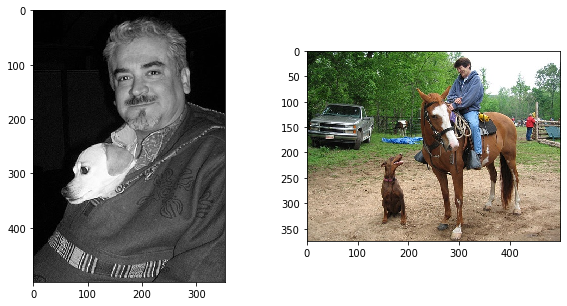

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5), facecolor='w')
plt.subplot(1, 2, 1)
show_img1 = cv2.cvtColor(images1, cv2.COLOR_BGR2RGB) 
plt.imshow(show_img1)

plt.subplot(1, 2, 2)
show_img2 = cv2.cvtColor(images2, cv2.COLOR_BGR2RGB) 
plt.imshow(show_img2)

由于cv2读取出来的图片默认是BGR编码的，我们使用matplotlib显示的时候需要转化为RGB编码

# 4.图像缩放

In [4]:
shapes = images2.shape
print(shapes)

(375, 500, 3)


(300, 400, 3)


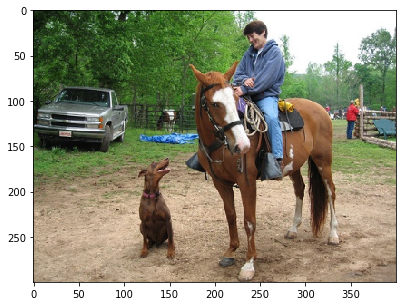

In [5]:
height = shapes[0]
width = shapes[1]
dst_height = int(height * 0.8)
dst_width = int(width * 0.8)
dst = cv2.resize(images2, (dst_width, dst_height))
print(dst.shape)
plt.figure(figsize=(10,5), facecolor='w')
show_img2 = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB) 
plt.imshow(show_img2)

# 5.图片规则裁剪

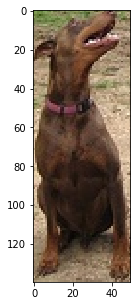

In [20]:
dst = images2[205:345, 145:195] # [x1:x2, y1:y2]
plt.figure(figsize=(10,5), facecolor='w')
show_img2 = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB) 
plt.imshow(show_img2)

# 6.图片不规则裁剪

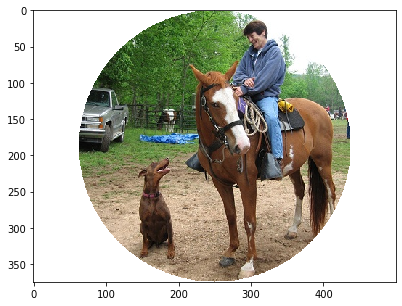

In [39]:
import numpy as np
img = cv2.imread("Images/01/09/02.jpg", cv2.IMREAD_UNCHANGED)
height, width, channel = img.shape
img_new = np.zeros((height, width, 4), dtype=np.uint8)
img_new[:, :, 0:3] = img[:, :, 0:3]
img_circle = np.zeros((height, width, 1), dtype=np.uint8)
img_circle[:, :, :] = 0
img_circle = cv2.circle(img_circle, (width // 2, height // 2), int(min(height, width) / 2), 255, -1)
img_new[:, :, 3] = img_circle[:, :, 0]

plt.figure(figsize=(10,5), facecolor='w')
unReg = cv2.cvtColor(img_new, cv2.COLOR_BGR2RGBA) 
plt.imshow(unReg)

# 7.通道转换

读取图像，然后将RGB通道替换成BGR通道。opencv默认是按照BGR来读取图片的，下面代码将BGR转换成RGB然后显示

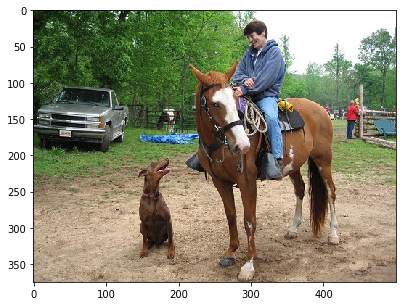

In [3]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread("Images/01/09/02.jpg")
b = img[:, :, 0].copy()
g = img[:, :, 1].copy()
r = img[:, :, 2].copy()

# BGR > RGB
img[:, :, 0] = r
img[:, :, 1] = g
img[:, :, 2] = b

plt.figure(figsize=(10,5), facecolor='w')
show_img1 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
plt.imshow(img)

# 8.灰度化-Grayscale
将图像灰度化吧！灰度是一种图像亮度的表示方法，通过下式计算：
$$Y = 0.2126R + 0.7152G + 0.0722B$$

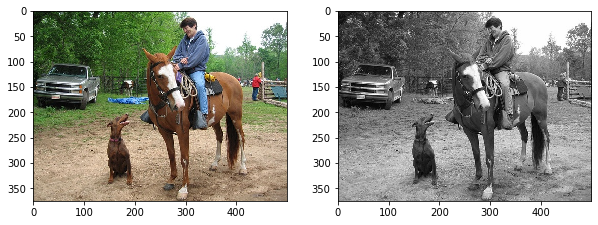

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read image
img = cv2.imread("Images/01/09/02.jpg")
b = img[:, :, 0].copy()
g = img[:, :, 1].copy()
r = img[:, :, 2].copy()

# Gray scale
out = 0.2126 * r + 0.7152 * g + 0.0722 * b
out = out.astype(np.uint8)

plt.figure(figsize=(10,5), facecolor='w')
plt.subplot(1, 2, 1)
show_img1 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
plt.imshow(show_img1)

plt.subplot(1, 2, 2)
show_img2 = cv2.cvtColor(out, cv2.COLOR_BGR2RGB) 
plt.imshow(show_img2)

# 9.二值化
二值化是将图像使用黑和白两种值表示的方法，我们将灰度的阈值设置为 128 来进行二值化

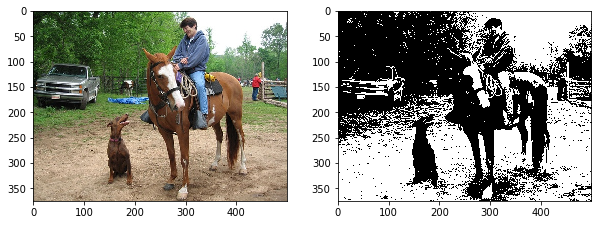

In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read image
img = cv2.imread("Images/01/09/02.jpg")
b = img[:, :, 0].copy()
g = img[:, :, 1].copy()
r = img[:, :, 2].copy()

# Gray scale
out = 0.2126 * r + 0.7152 * g + 0.0722 * b
out = out.astype(np.uint8)
th = 128
out[out < th] = 0
out[out >= th] = 255

plt.figure(figsize=(10,5), facecolor='w')
plt.subplot(1, 2, 1)
show_img1 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
plt.imshow(show_img1)

plt.subplot(1, 2, 2)
show_img2 = cv2.cvtColor(out, cv2.COLOR_BGR2RGB) 
plt.imshow(show_img2)

# 10.二值化-大津算法(Otsu's Method)
大津二值化算法与普通二值化算法的区别就是大津算法可以自动确定二值化中的阈值，而普通二值化算法的阈值就是128

- 小于阈值t的类记作0，大于阈值t的类记作1；
- w0和w1是被阈值t分开的两个类中的像素数占总像素数的比率（满足 w0+w1=1）；
- $S0^2$,$S1^2$是这两个类中像素值的方差；
- M0, M1 是这两个类的像素值的平均值；

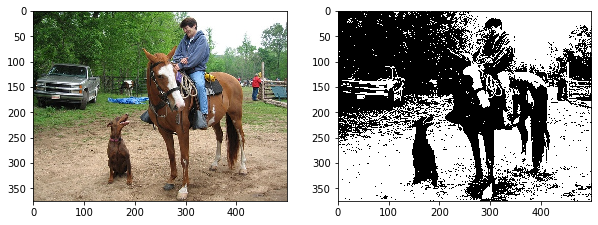

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read image
img = cv2.imread("Images/01/09/02.jpg")
b = img[:, :, 0].copy()
g = img[:, :, 1].copy()
r = img[:, :, 2].copy()
H, W, C = img.shape
# Gray scale
out = 0.2126 * r + 0.7152 * g + 0.0722 * b
out = out.astype(np.uint8)

max_sigma = 0
max_t = 0

for _t in range(1, 255):
    v0 = out[np.where(out < _t)]
    m0 = np.mean(v0) if len(v0) > 0 else 0.
    w0 = len(v0) / (H * W)
    v1 = out[np.where(out >= _t)]
    m1 = np.mean(v1) if len(v1) > 0 else 0.
    w1 = len(v1) / (H * W)
    sigma = w0 * w1 * ((m0 - m1) ** 2)
    if sigma > max_sigma:
        max_sigma = sigma
        max_t = _t

th = max_t
out[out < th] = 0
out[out >= th] = 255

plt.figure(figsize=(10,5), facecolor='w')
plt.subplot(1, 2, 1)
show_img1 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
plt.imshow(show_img1)

plt.subplot(1, 2, 2)
show_img2 = cv2.cvtColor(out, cv2.COLOR_BGR2RGB) 
plt.imshow(show_img2)

# 11.HSV转换
HSV使用色相Hue、饱和度Saturation、明度Value来表示色彩的一种方式。

## 11.1.色相
将颜色使用0到360度表示，就是平常所说的颜色名称，如红色、蓝色。色相与数值按下表对应

| 红 | 黄 | 绿 | 青 | 蓝 | 品红 |
| -- | -- | -- | -- | -- | -- |
| 0 | 60 | 120 | 180 | 240 | 300 |

## 11.2.饱和度
指色彩的纯度，饱和度越低则颜色越黯淡($0 \leq S < 1$)

## 11.3.明度
颜色的明暗程度。数值越高越接近白色，数值越低越接近黑色($0 \leq V < 1$)

# 12.减色处理
这里我们将图像的值由$256^3$压缩至$4^3$，即将RGB的值只取$\{32, 96, 160, 224\}$。这被称作色彩量化。具体定义如下:
$$\begin{cases}
32 & 0 \leq val < 64 \\
96 & 64 \leq val < 128 \\
160 & 128 \leq val < 192 \\
224 & 192 \leq val < 256
\end{cases}$$

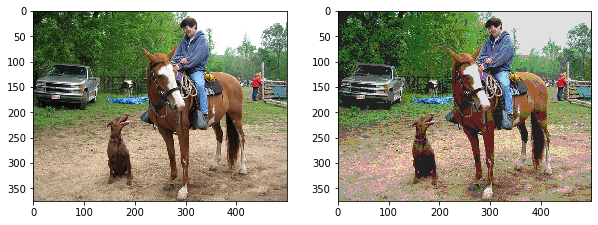

In [2]:
import cv2
import matplotlib.pyplot as plt

# Read image
img = cv2.imread("Images/01/09/02.jpg")

out = (img // 64) * 64 + 32

plt.figure(figsize=(10,5), facecolor='w')
plt.subplot(1, 2, 1)
show_img1 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
plt.imshow(show_img1)

plt.subplot(1, 2, 2)
show_img2 = cv2.cvtColor(out, cv2.COLOR_BGR2RGB) 
plt.imshow(show_img2)

# 13.平均池化
将图片按照固定大小网格分割，网格内的像素值取网格内所有像素的平均值。我们将这种把图片使用均等大小网格分割，并求网格内代表值的操作称为池化(Pooling)

池化操作是卷积神经网络(Convolutional Neural Network)中重要的图像处理方式。平均池化按照下式定义：
$$v = \frac{1}{|R|} \times Sum_{i in R}v_i$$

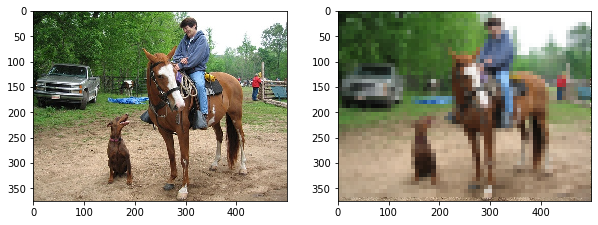

In [4]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

img = cv2.imread("Images/01/09/02.jpg")
out = img.copy()

H,W,C = img.shape
G = 8
Nh = int(H/G)
Nw = int(W/G)
for y in range(Nh):
    for x in range(Nw):
        for c in range(C):
            out[G*y:G*(y+1), G*x:G*(x+1), c] = np.mean(out[G*y:G*(y+1), G*x:G*(x+1), c]).astype(np.int)
            
plt.figure(figsize=(10,5), facecolor='w')
plt.subplot(1, 2, 1)
show_img1 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
plt.imshow(show_img1)

plt.subplot(1, 2, 2)
show_img2 = cv2.cvtColor(out, cv2.COLOR_BGR2RGB) 
plt.imshow(show_img2)

# 14.最大池化
网格内的值不取平均值，而是取网格内的最大值进行池化操作

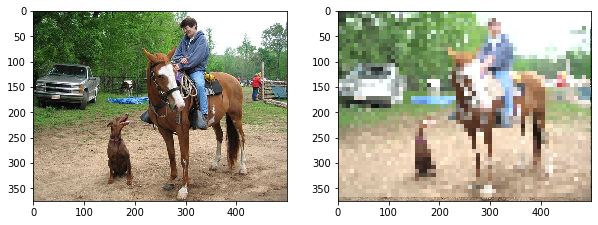

In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

img = cv2.imread("Images/01/09/02.jpg")
out = img.copy()

H,W,C = img.shape
G = 8
Nh = int(H/G)
Nw = int(W/G)
for y in range(Nh):
    for x in range(Nw):
        for c in range(C):
            out[G*y:G*(y+1), G*x:G*(x+1), c] = np.max(out[G*y:G*(y+1), G*x:G*(x+1), c]).astype(np.int)
            
plt.figure(figsize=(10,5), facecolor='w')
plt.subplot(1, 2, 1)
show_img1 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
plt.imshow(show_img1)

plt.subplot(1, 2, 2)
show_img2 = cv2.cvtColor(out, cv2.COLOR_BGR2RGB) 
plt.imshow(show_img2)



# 15.伽玛矫正

伽马校正用来对照相机等电子设备传感器的非线性光电转换特性进行校正。如果图像原样显示在显示器等上，画面就会显得很暗。伽马校正通过预先增大RGB的值来排除显示器的影响，达到对图像修正的目的。由于$x'=cI_{in}^g$引起非线性变换，在该式中，$x$被归一化，限定在$[0,1]$范围内。$c$是常数，$g$为伽马变量（通常取2.2），因此，使用下面的式子进行伽马校正

$$I_{out} ={\frac{1}{c}I_{in}}^{\frac{1}{g}}$$

| 显示屏上的图像显示 | $\gamma$修正值|
| --------------- | ------------ |
| ![images](Images/01/09/01_001.jpg) | ![images](Images/01/09/01_002.jpg) |

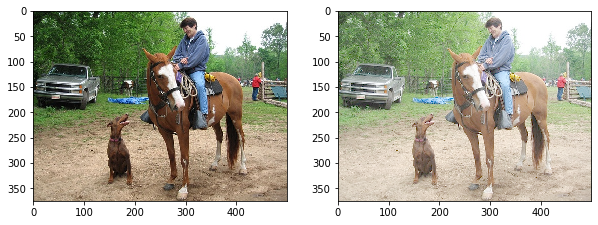

In [4]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

img = cv2.imread("Images/01/09/02.jpg")

out = img.astype(np.float).copy()
out /= 255.
out = (1/1 * out) ** (1/2.2)
out *= 255
out = out.astype(np.uint8)
            
plt.figure(figsize=(10,5), facecolor='w')
plt.subplot(1, 2, 1)
show_img1 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
plt.imshow(show_img1)

plt.subplot(1, 2, 2)
show_img2 = cv2.cvtColor(out, cv2.COLOR_BGR2RGB) 
plt.imshow(show_img2)
